#### **태양광 발전소 데이터 분석**
---
##### **발전량 예측 개요**

1. 태양광 발전소에서 나오는 각종 데이터를 사용하여 발전량을 예측한다.
2. 기상 데이터와 발전소 데이터의 관계를 파악하여 발전량 예측 Parameter로 사용한다.
3. 발전량 예측에 가장 적합한 변수들을 파악한다.
---
##### **발전소 데이터**
1. 접속반 : 직렬로 구성된 모듈을 병렬로 병합하여, 인버터와 연결되는 중간 연결 설비  
(1) DC 전압, DC 전류, 전속반 온도, 다이오드 온도  
(2) 병렬로 구성된 스트링별 전압의 평균이라고는 하나 전압은 최저전압을 따라가므로 최저전압으로 판단됨
2. 인버터 : 접속반에서 생산된 DC 전력을 AC(교류)로 변환하는 설비  
(1) solar voltage, solar current, solar kw, inverterkw, linevoltage, linecurrent, linepf, linehz  
(2) 인버터 데이터는 접속반 데이터와 상호 비교 가능한 solarvoltage, solarcurrent, solarkw데이터가 있으며,  
    solarkw와 inverterkw를 사용하여 인버터 변환 효율을 산출할수 있다.
3. 수배전반 : 인버터에서 생산된 AC 전력을 계통을 내보내기 위한 변압기가 설치 되어있으며, 계통보호를 위한 차단기가 설치되어있는 설비  
(1) 수배전반의 출력과 인버터의 출력을 통하여, 실제출력을 확인할 수 있다.  
4. 기상반 : 발전소의 각종 기상상황을 센싱하여 데이터 저장  
(1) 일사량(수평, 경사), 외기온도, 모듈온도, 풍속
---
##### **발전소 분석**
1. 태양광 발전소는 일사량에 영향을 가장 크게받는다.
2. 온도와 태양광 발전소의 출력과의 관계를 분석 할 수 있다.
3. 각종 설비 데이터를 통하여 배선효율, 출력효율을 실시간을 확인 가능하다.
4. 데이터만으로 발전소의 성능을 진단한다.

In [1]:
# 발전량과 일사량 시각화
import matplotlib.pyplot as plt

# 글꼴 깨짐 해결
import os

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import datetime

# 영광염전 태양광 발전소의 데이터 중 1번 인버터와 그연관된 설비 데이터를 사용하여 분석한다.
# 영광염전 사용 데이터 import
# 접속반의 데이터가 2017-01-01부터 시작하므로, 다른 설비의 데이터 사용일도 같은날로 맞춘다.
root_path = 'D:/99. Big data engine & dashboard/1. kcse/3. raw_data/3. dsolar'

# 1) 접속반 데이터
conn_folder = '/connectbox' # 해당 설비 폴더

total_conn = pd.DataFrame()

conn1_df = pd.read_pickle(root_path+conn_folder+'/E1_V1_J1.pickle')
total_conn = pd.concat([total_conn, conn1_df], ignore_index=True, copy=True)
conn2_df = pd.read_pickle(root_path+conn_folder+'/E1_V1_J2.pickle')
total_conn = pd.concat([total_conn, conn2_df], ignore_index=True, copy=True)
conn3_df = pd.read_pickle(root_path+conn_folder+'/E1_V1_J3.pickle')
total_conn = pd.concat([total_conn, conn3_df], ignore_index=True, copy=True)
conn4_df = pd.read_pickle(root_path+conn_folder+'/E1_V1_J4.pickle')
total_conn = pd.concat([total_conn, conn4_df], ignore_index=True, copy=True)
conn5_df = pd.read_pickle(root_path+conn_folder+'/E1_V1_J5.pickle')
total_conn = pd.concat([total_conn, conn5_df], ignore_index=True, copy=True)

total_conn.head()

,item_no,create_date,v_total,v01,v02,v03,v04,v05,v06,v07,...,a13,a14,a15,a16,a17,a18,a19,a20,a31,a32
0,21,2017-01-01 06:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.0
1,21,2017-01-01 06:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.0
2,21,2017-01-01 06:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.0
3,21,2017-01-01 06:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.0
4,21,2017-01-01 06:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9,1.0


In [3]:
# 2) 인버터 데이터
inverter_folder = '/inverter'

ivt_df = pd.read_pickle(root_path+inverter_folder+'/inverter1.pickle')

# 사용 데이터 filter
ivt_data_list = ['create_date','solarvoltage','solarcurrent','solarkw','inverterkw']
total_ivt = ivt_df[ivt_data_list]

# 접속반 데이터에 맞춰 2017년 1월 1일 데이터부터 사용
total_ivt = total_ivt[total_ivt['create_date'] >= '2017-01-01 00:00:00']

total_ivt.reset_index(drop=True, inplace=True)

total_ivt.head()

,create_date,solarvoltage,solarcurrent,solarkw,inverterkw
0,2017-01-01 06:00:00,16.0,0.0,0.0,0.0
1,2017-01-01 06:01:00,16.0,0.0,0.0,0.0
2,2017-01-01 06:02:00,16.0,0.0,0.0,0.0
3,2017-01-01 06:03:00,16.0,0.0,0.0,0.0
4,2017-01-01 06:04:00,16.0,0.0,0.0,0.0


In [4]:
# 3) 수배전반 데이터
digitalmeter_folder = '/digitalmeter'

dig_df = pd.read_pickle(root_path+digitalmeter_folder+'/acb_1_1.pickle')

# 사용 데이터 filter
dig_columns_list = ['create_date','LinekW']
total_dig = dig_df[dig_columns_list]

# 접속반 데이터에 맞춰 2017년 1월 1일 데이터부터 사용
total_dig = total_dig[total_dig['create_date'] >= '2017-01-01 00:00:00']
total_dig.reset_index(drop=True, inplace=True)

total_dig.head()

,create_date,LinekW
0,2017-01-01 06:00:00,0.0
1,2017-01-01 06:01:00,0.0
2,2017-01-01 06:02:00,0.0
3,2017-01-01 06:03:00,0.0
4,2017-01-01 06:04:00,0.0


In [5]:
# 4) 기상반 데이터
weather_folder = '/weather'

wt_df = pd.read_pickle(root_path+weather_folder+'/wt_1.pickle')

# 사용 데이터 filter
wt_columns_list = ['create_date','irra','out_temp','mod_temp']
total_wt = wt_df[wt_columns_list]

# 접속반 데이터에 맞춰 2017년 1월 1일 데이터부터 사용
total_wt = total_wt[total_wt['create_date'] >= '2017-01-01 00:00:00']
total_wt.reset_index(drop=True, inplace=True)

total_wt.head()

,create_date,irra,out_temp,mod_temp
0,2017-01-01 06:00:00,0.4375,2.174999,1.625
1,2017-01-01 06:01:00,0.4375,2.174999,1.625
2,2017-01-01 06:02:00,0.4375,2.174999,1.625
3,2017-01-01 06:03:00,0.8750,2.200001,1.650
4,2017-01-01 06:04:00,0.4375,2.174999,1.650


##### **데이터 관계**
---
1. 발전량과 일사량은 매우 유사한 관계를 보일 것이다.
2. 모듈온도는 외기온도, 일사량, 전압, 전류를 통하여 관계를 분석할 수 있다.
3. 예측에 사용할 데이터를 신중하게 선택하여야 한다. 그 데이터를 통하여 예측 값을 출력해야한다는걸 명심해야한다.

In [6]:
# 1. 발전량과 일사량 관계 분석
# - 발전량은 인버터 발전량을 사용하며, 발전소 기상데이터와 비교한다.
import numpy as np
from scipy import stats

ivt_wt_df = total_ivt.merge(total_wt, on='create_date',how='inner')

# dataframe에 담긴 데이터 type 확인
#print(ivt_wt_df.info())

ivt_wt_df = ivt_wt_df[ivt_wt_df['irra'] < 1500]
#print(len(ivt_wt_df))
print(ivt_wt_df.describe().round(2))

ivt_wt_df.dropna(inplace=True)

# list를 array로 변경(함수 사용엔 대부분 array type parameter 사용)
ivt_kw = np.array(ivt_wt_df['inverterkw'])
wt_irra = np.array(ivt_wt_df['irra'])

# 1) 피어슨 상관계수
ps = stats.pearsonr(ivt_kw, wt_irra)
# 2) 스피어만 상관계수
sp = stats.spearmanr(ivt_kw, wt_irra)

print('피어슨 상관계수(-1 ~ +1) : ', ps[0])
print('스피어만 상관계수 : ', sp[0])

       solarvoltage  solarcurrent     solarkw  inverterkw        irra  \
count    1419837.00    1419837.00  1419837.00  1419837.00  1419837.00   
mean         371.44        151.74       95.11       94.98      159.05   
std          305.43        226.76      140.12      140.28      228.10   
min            0.00          0.00        0.00        0.00        0.00   
25%           16.00          0.00        0.00        0.00        0.44   
50%          586.00         11.00        7.00        6.00       16.19   
75%          638.00        243.00      157.00      157.00      269.50   
max          854.00       6552.60      514.00      511.00     1200.06   

         out_temp    mod_temp  
count  1419837.00  1419837.00  
mean        15.10       19.13  
std         10.11       14.69  
min        -30.00      -16.17  
25%          6.62        7.38  
50%         15.55       18.30  
75%         23.40       27.72  
max         40.28       67.68  
피어슨 상관계수(-1 ~ +1) :  0.97095636572774
스피어만 상관계수 :  0.9

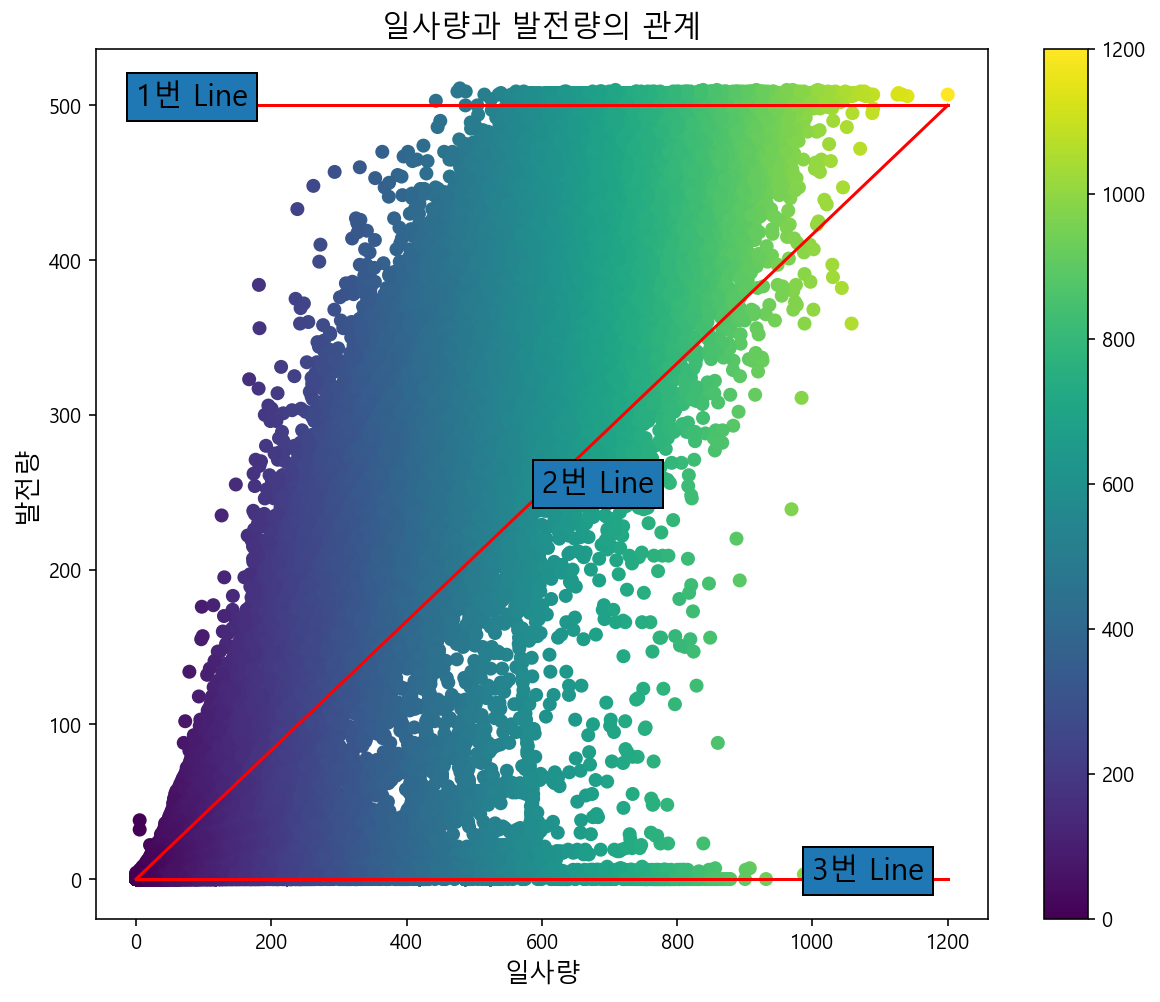

In [7]:
title_font_size = 15
label_font_size = 13

plt.figure(figsize=(10,8))

plt.scatter(y=ivt_wt_df['inverterkw'], x=ivt_wt_df['irra'], c=ivt_wt_df['irra'], cmap='viridis')
_ = plt.plot([0, 1200],[0, 0], 'r-')
_ = plt.plot([0, 1200],[500, 500], 'r-')
_ = plt.plot([0, 1200], [0, 500], 'r-')

plt.text(0, 500, '1번 Line', fontsize=15, bbox=dict(boxstyle='square'))
plt.text(600, 250, '2번 Line', fontsize=15, bbox=dict(boxstyle='square'))
plt.text(1000, 0, '3번 Line', fontsize=15, bbox=dict(boxstyle='square'))

plt.title('일사량과 발전량의 관계', fontsize=title_font_size)
plt.xlabel('일사량', fontsize=label_font_size)
plt.ylabel('발전량', fontsize=label_font_size)
plt.colorbar()

plt.show()

1번 Line : 일사량이 증가해도 계절별로 발전소의 용량에 한계가 있어 더이상 출력이 증가하지 않고 일사량만 증가  
2번 Line : 일사량과 출력에 대한 이론적인 관계  
3번 Line : 일사량이 증가해도 출력이 0으로 발전소 점검,순간정전 및 통신오류 등으로 노이즈 데이터 발생 

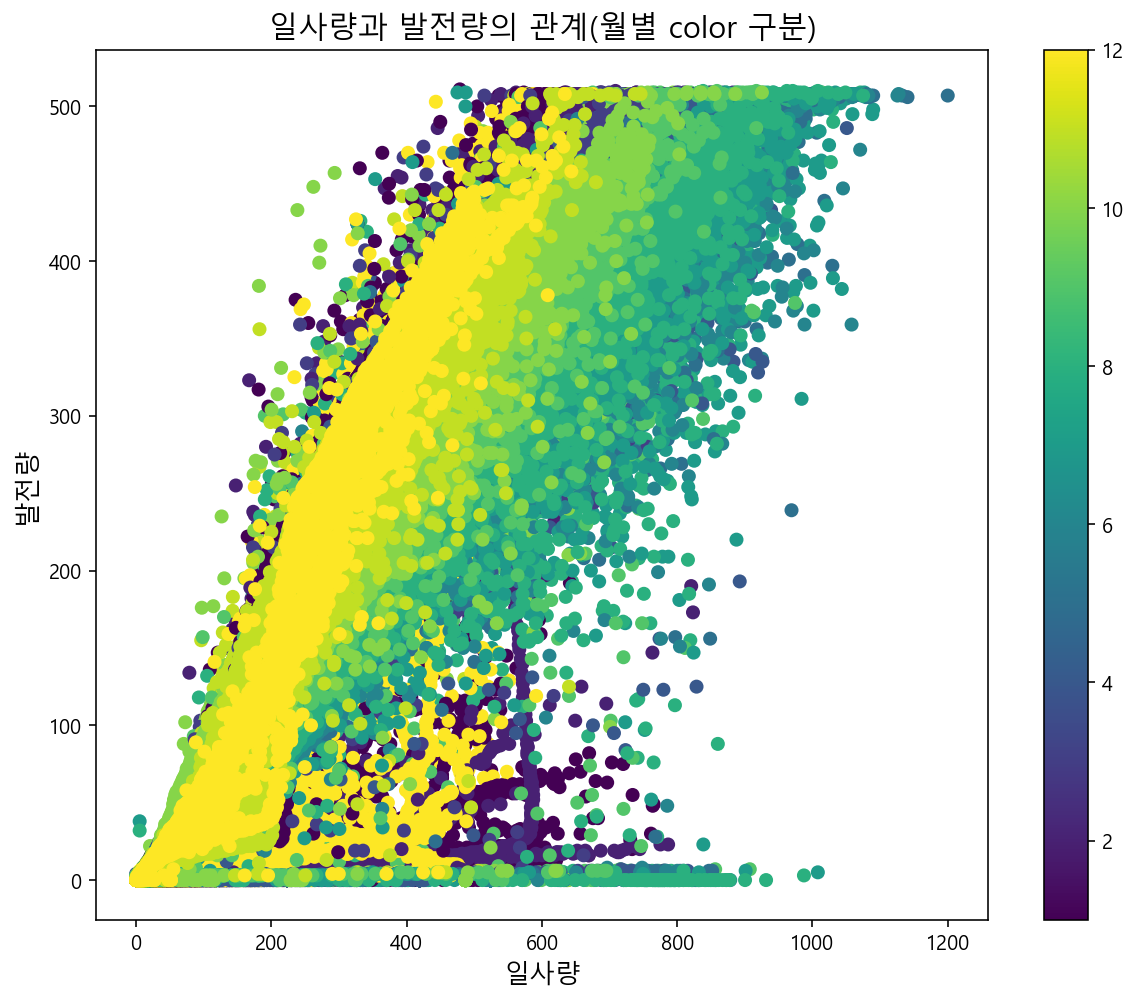

In [8]:
# 참고 1. 일사량과 발전량의 관계를 월별로 구분하여 확인

create_date = ivt_wt_df['create_date']

ivt_wt_df['month'] = create_date.dt.month

title_font_size = 15
label_font_size = 13

plt.figure(figsize=(10,8))

plt.scatter(y=ivt_wt_df['inverterkw'], x=ivt_wt_df['irra'], c=ivt_wt_df['month'], cmap='viridis')

plt.title('일사량과 발전량의 관계(월별 color 구분)', fontsize=title_font_size)
plt.xlabel('일사량', fontsize=label_font_size)
plt.ylabel('발전량', fontsize=label_font_size)
plt.colorbar()

plt.show()

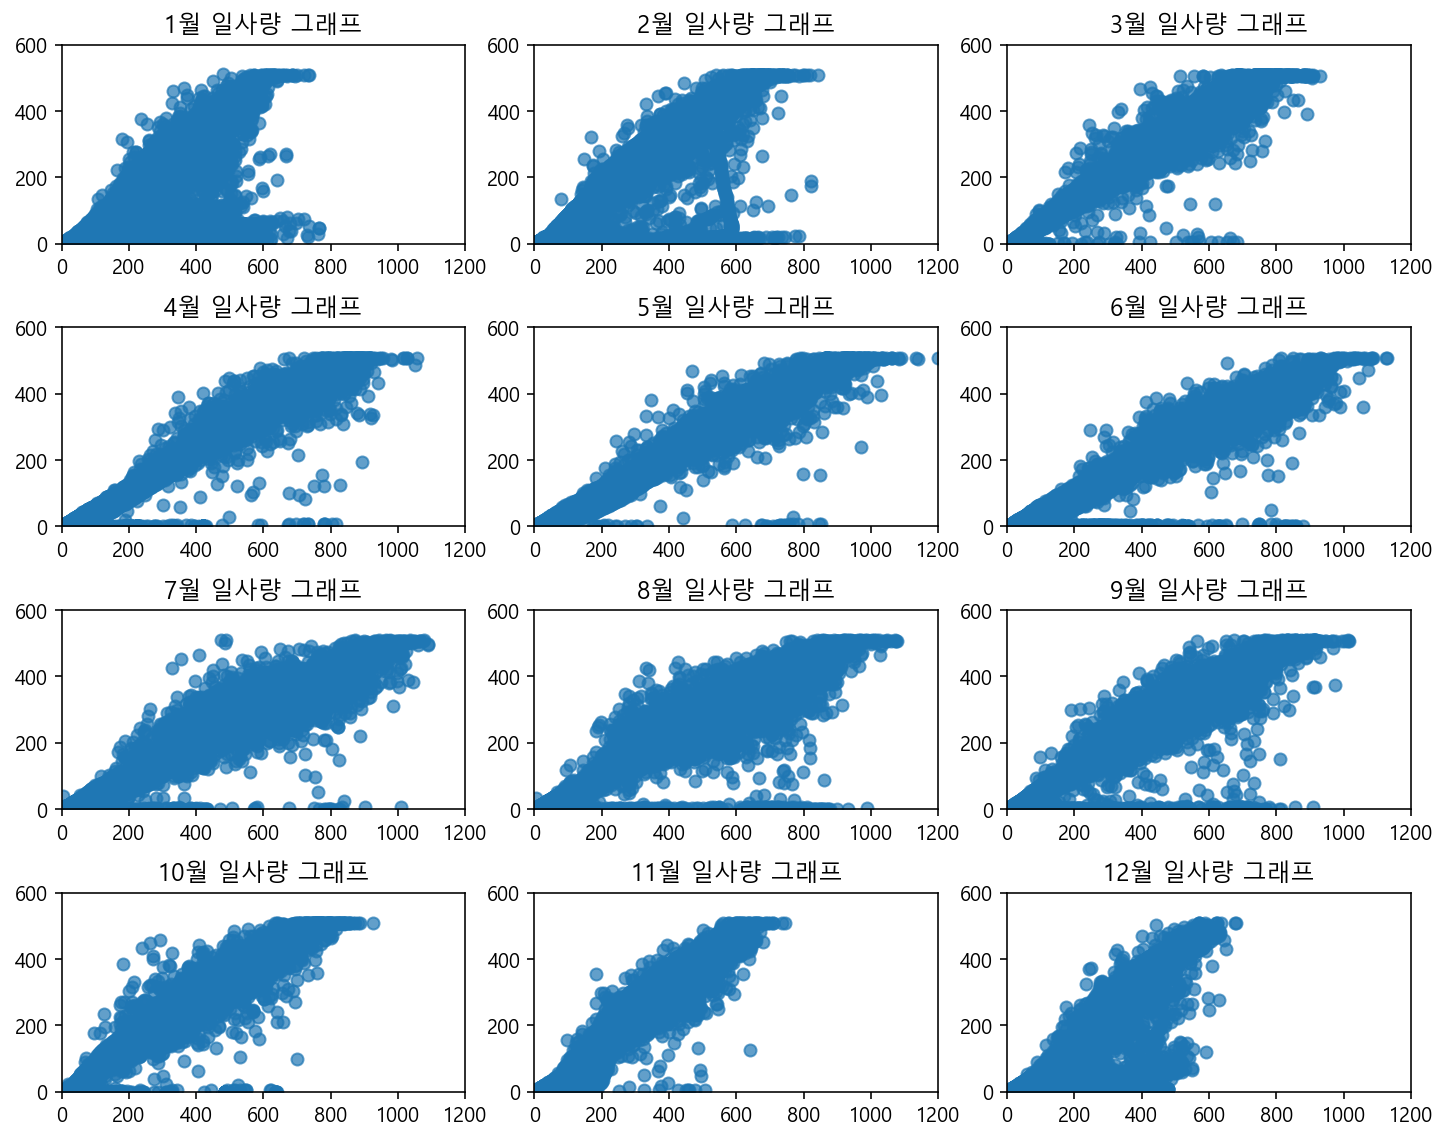

In [9]:
# 참고 2. 월별 일사량 변화 시각화
# 그래프 속성
plt.figure(figsize=(10, 8))

# 그래프 위치
n = 1

for month_ in range(1,13):
    g_data = ivt_wt_df[(ivt_wt_df['month'] == month_)]
    
    # sub plot
    ax = plt.subplot(4, 3, n) # for문을 실행하면서 Axes를 추가
    
    plt.title(f'{month_}월 일사량 그래프')
    
    ax.scatter(x=g_data['irra'], y=g_data['inverterkw'], alpha=0.7)
    
    ax.set_xlim([0, 1200])
    ax.set_ylim([0, 600])
    
    n += 1
    
plt.tight_layout()

plt.show()

월별 일사량 분포를 확인하면, 일사량은 하절기에 점점 증가하며 동절기엔 줄어든다.

In [10]:
# 접속반 전류, 전압 column list
def cols_to_list(flag, d_range):
    if flag == 'a':
        if d_range < 10:
            return 'a0'+str(d_range)
        else:
            return 'a'+str(d_range)
    elif flag == 'v':
        if d_range < 10:
            return 'v0'+str(d_range)
        else:
            return 'v'+str(d_range)

In [11]:
# 전압에서 0을 제회한 나머지 값 중 최저 전압 산출
def voltage_remove_zero(arr_series):
    arr_list = arr_series.tolist()
    
    if np.sum(arr_list) == 0:
        return 0.0
    else:
        set_list = [x for x in arr_list if x > 0]
        
        return np.min(set_list)

In [12]:
# 접속반의 출력과 인버터의 DC 출력을 비교하여 전기 배선의 효율을 확인

# columns range
columns_range = list(range(1, 21))

# columns list
voltage_list = list(map(cols_to_list, 'v'*20, columns_range))
current_list = list(map(cols_to_list, 'a'*20, columns_range))

# 필요한 데이터만 사용
sub_conn_df = total_conn[['item_no','create_date']]

# copy
sub_conn_df = sub_conn_df.copy()

# 전압 : 최저전압, 전류 : 합계전류
# 1. 전압
sub_conn_df['v_min'] = total_conn[voltage_list].apply(lambda x : voltage_remove_zero(x) , axis=1)

# 2. 전류
sub_conn_df['a_sum'] = total_conn[current_list].apply(lambda x: sum(x), axis=1)

# group으로 최저전압, 합계전류 산출
sub_conn_group = sub_conn_df.groupby(['create_date'], as_index=False).sum()

sub_conn_group['v_min'] = sub_conn_df.groupby(['create_date'], as_index=False).mean()['v_min']

del sub_conn_group['item_no']

# DC 출력 산출
sub_conn_group['conn_kw'] = (sub_conn_group['v_min'] * sub_conn_group['a_sum']) / 1000

# 인터버와 기상반 데이터 Merge
# 1. inverter
sub_conn_group = sub_conn_group.merge(total_ivt, on='create_date', how='inner')
# 2. weather
sub_conn_group = sub_conn_group.merge(total_wt, on='create_date', how='inner')

# 접속반 최저 전압과 인버터 DC 전압 비교
sub_conn_group['vol_rate'] = (sub_conn_group['solarvoltage'] / sub_conn_group['v_min']) * 100

# 접속반 합계 전류와 인버터 DC 전류 비교
sub_conn_group['cur_rate'] = (sub_conn_group['solarcurrent'] / sub_conn_group['a_sum']) * 100

sub_conn_group[420:430]

,create_date,v_min,a_sum,conn_kw,solarvoltage,solarcurrent,solarkw,inverterkw,irra,out_temp,mod_temp,vol_rate,cur_rate
420,2017-01-01 13:00:00,626.540002,571.100004,357.816998,641.0,566.0,363.0,362.0,427.4375,12.474998,36.049999,102.307913,99.106986
421,2017-01-01 13:01:00,627.920020,566.200003,355.528317,627.0,574.0,360.0,360.0,422.6250,12.450001,35.650002,99.853481,101.377605
422,2017-01-01 13:02:00,629.360010,569.200002,358.231719,637.0,573.0,364.0,364.0,424.3750,12.325001,35.349998,101.213930,100.667603
423,2017-01-01 13:03:00,628.960010,576.100010,362.343868,642.0,573.0,368.0,368.0,428.3125,12.450001,35.250000,102.073262,99.461897
424,2017-01-01 13:04:00,628.740002,580.900012,365.235075,627.0,590.0,370.0,370.0,430.5000,12.424999,35.400002,99.723256,101.566533
425,2017-01-01 13:05:00,629.360010,583.500014,367.231574,632.0,589.0,372.0,372.0,432.2500,12.424999,35.400002,100.419472,100.942585
426,2017-01-01 13:06:00,629.820020,579.400010,364.917726,643.0,576.0,370.0,371.0,430.5000,12.275002,35.200001,102.092658,99.413184
427,2017-01-01 13:07:00,630.180017,581.200011,366.260633,629.0,589.0,370.0,369.0,431.8125,12.325001,35.000000,99.812749,101.342049
428,2017-01-01 13:08:00,630.200000,580.900012,366.083187,635.0,585.0,371.0,371.0,429.6250,12.200001,34.799999,100.761663,100.705799
429,2017-01-01 13:09:00,628.940015,577.300006,363.087074,645.0,568.0,367.0,367.0,423.9375,12.125000,34.875000,102.553500,98.389051


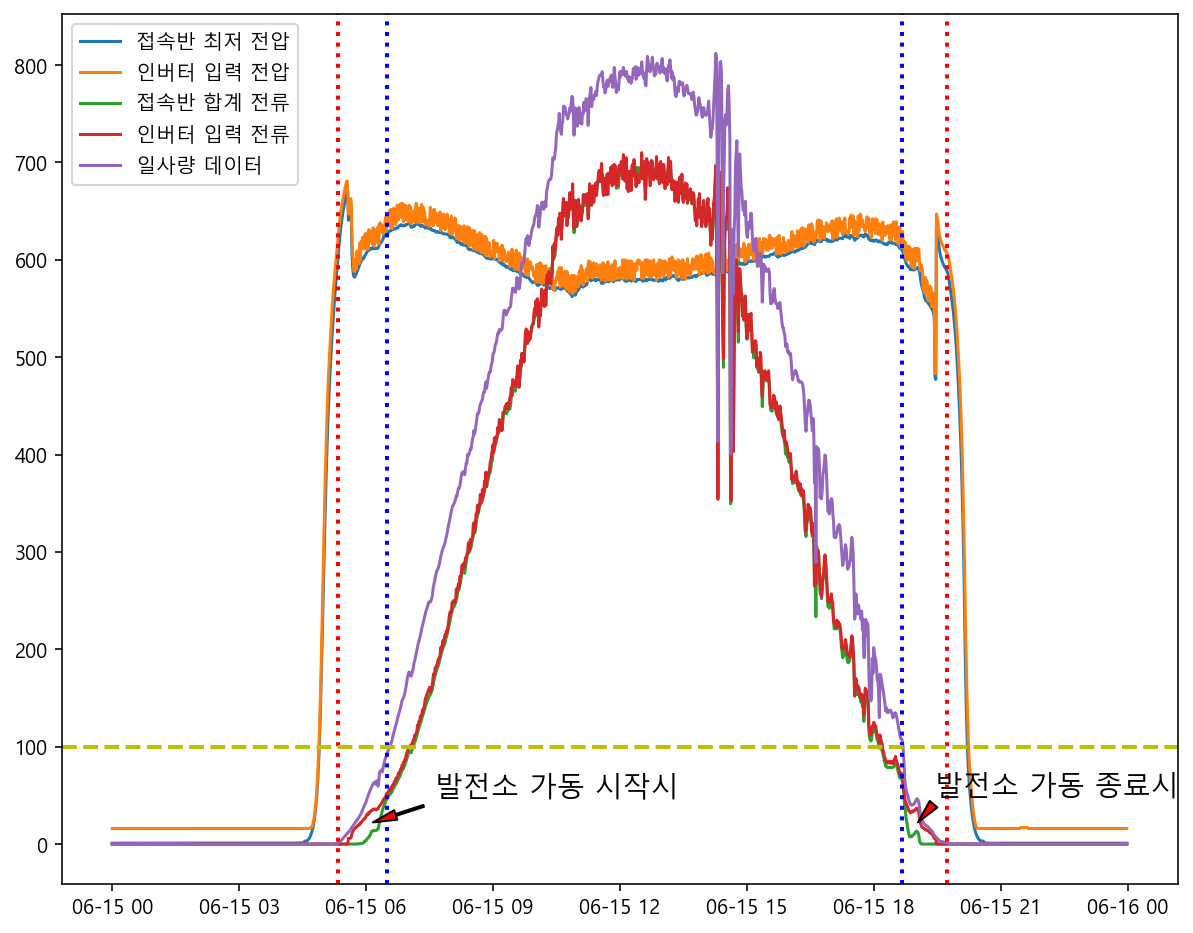

In [13]:
graph_test_df6 = sub_conn_group[(sub_conn_group['create_date'] >= '2018-06-15 00:00:00')&(sub_conn_group['create_date'] <= '2018-06-15 23:59:00')]

create_date = graph_test_df6['create_date']

plt.figure(figsize=(10, 8))

plt.plot(create_date, graph_test_df6['v_min'], label='접속반 최저 전압')
plt.plot(create_date, graph_test_df6['solarvoltage'], label='인버터 입력 전압')
plt.plot(create_date, graph_test_df6['a_sum'], label='접속반 합계 전류')
plt.plot(create_date, graph_test_df6['solarcurrent'], label='인버터 입력 전류')
plt.plot(create_date, graph_test_df6['irra'], label='일사량 데이터')

#plt.plot(create_date, graph_test_df['out_temp'], label='외기온도')

plt.axvline(x='2018-06-15 05:20', color='r', linestyle=':', linewidth=2)
plt.axvline(x='2018-06-15 19:44', color='r', linestyle=':', linewidth=2)

plt.axvline(x='2018-06-15 06:30', color='b', linestyle=':', linewidth=2)
plt.axvline(x='2018-06-15 18:40', color='b', linestyle=':', linewidth=2)

plt.axhline(y=100, color='y', linestyle='--', linewidth=2)

plt.annotate('발전소 가동 시작시', xy=('2018-06-15 06:00:00', 20), xytext=('2018-06-15 10:30:00', 50), fontsize=14, ha='center',arrowprops=dict(facecolor='red', width=1, shrink=0.1, headwidth=5))
plt.annotate('발전소 가동 종료시', xy=('2018-06-15 19:00:00', 20), xytext=('2018-06-15 22:20:00', 50), fontsize=14, ha='center',arrowprops=dict(facecolor='red', width=1, shrink=0.1, headwidth=5))

plt.legend()

plt.show()

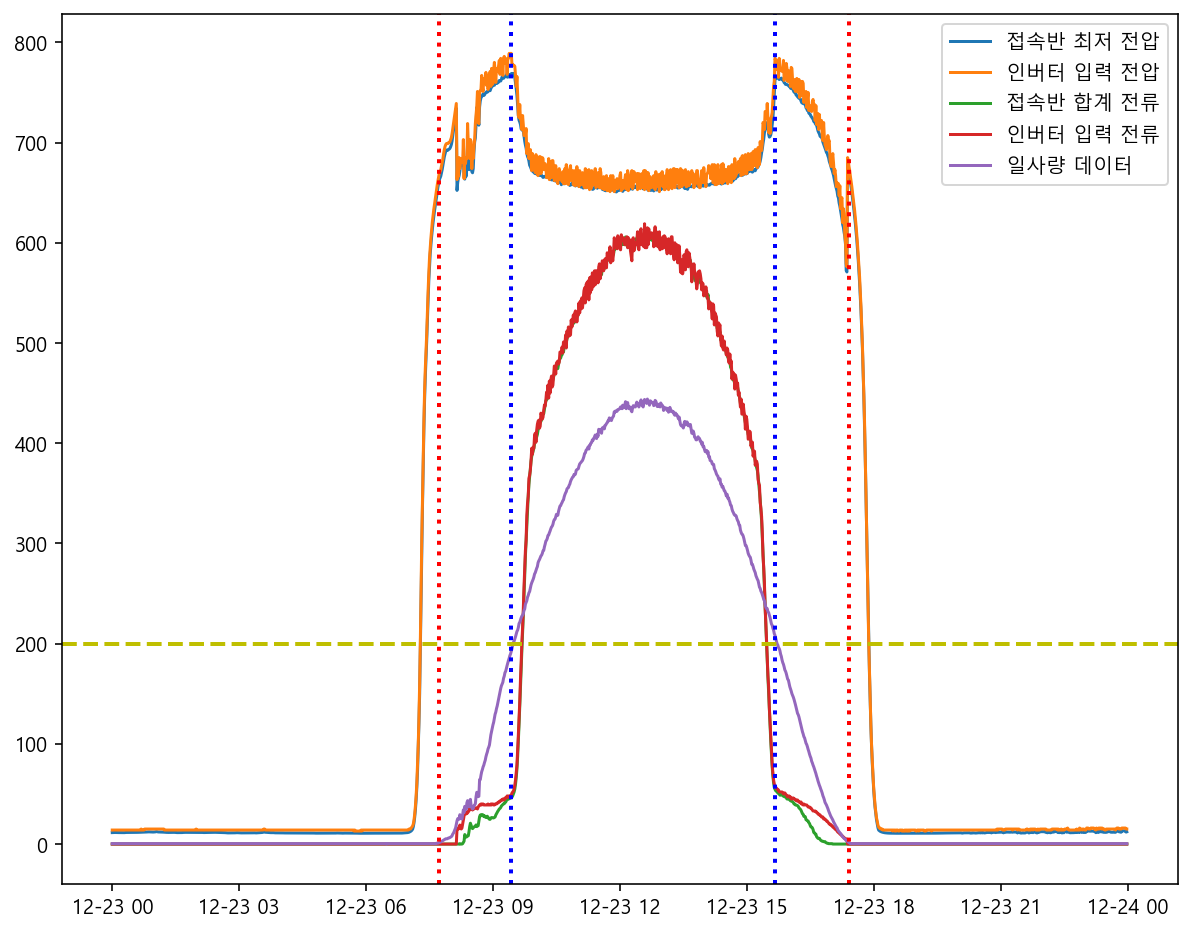

In [14]:
graph_test_df12 = sub_conn_group[(sub_conn_group['create_date'] >= '2018-12-23 00:00:00')&(sub_conn_group['create_date'] <= '2018-12-23 23:59:00')]

plt.figure(figsize=(10, 8))

plt.plot(graph_test_df12['create_date'], graph_test_df12['v_min'], label='접속반 최저 전압')
plt.plot(graph_test_df12['create_date'], graph_test_df12['solarvoltage'], label='인버터 입력 전압')
plt.plot(graph_test_df12['create_date'], graph_test_df12['a_sum'], label='접속반 합계 전류')
plt.plot(graph_test_df12['create_date'], graph_test_df12['solarcurrent'], label='인버터 입력 전류')
plt.plot(graph_test_df12['create_date'], graph_test_df12['irra'], label='일사량 데이터')

plt.axvline(x='2018-12-23 07:43', color='r', linestyle=':', linewidth=2)
plt.axvline(x='2018-12-23 17:25', color='r', linestyle=':', linewidth=2)

plt.axvline(x='2018-12-23 09:25', color='b', linestyle=':', linewidth=2)
plt.axvline(x='2018-12-23 15:40', color='b', linestyle=':', linewidth=2)

plt.axhline(y=200, color='y', linestyle='--', linewidth=2)

#plt.annotate('발전소 가동 시작시', xy=('2018-12-22 06:00:00', 20), xytext=('2018-12-22 10:30:00', 50), fontsize=14, ha='center',arrowprops=dict(facecolor='red', width=1, shrink=0.1, headwidth=10))
#plt.annotate('발전소 가동 종료시', xy=('2018-12-22 19:00:00', 20), xytext=('2018-12-22 22:00:00', 100), fontsize=14, ha='center',arrowprops=dict(facecolor='red', width=1, shrink=0.1, headwidth=10))

plt.legend()

plt.show()

1. 발전소 가동/종료시에 접속반에서 발생하는 전류의 합계가 인버터 Input solarcurrent 보다 낮은 데이터가 입력됨
2. 출력이 낮을때 인버터의 MPPT 기능으로 인하여, 전류가 부스팅되는 현상으로 추측
3. 접속반의 합계 전류와 인버터의 입력 전류가 동일하게되는 시점의 일사량값을 찾아 배선효율을 산출
4. Red line : 일사량이 발생하기 시작함(발전소가 가동)
5. Blue line : 인버터가 전류 부스팅으로 낮아진 전압이 정상 출력으로 회복하는 시점.
6. 15시쯤 일사량은 구름에 의해 값이 크게 변하는 것을 확인 할수 있으며, 이것과 동일하게 전류값이 변하는 것을 확인
7. 인버터의 MPPT에 의한 전류 부스팅이 하절기(6월)에는 100Wh/m2까지 진행되며, 동절기(12월)에는 200Wh/m2까지 진행

---
1. 전압의 패턴이 하절기와 동절기에 전혀 다르게 보여지고 있기 때문에 온도와 전압의 관계 시각화
2. 모듈온도가 낮을 수록 전압이 높을 것으로 예상
3. 온도가 발전량에 영향을 미치는 원인은 바로 전압에 영향을 주기 때문으로 판단

In [15]:
# 분기별로 서로 다른 일사량 데이터를 사용하여 확인
# 전압과 전류보다 배선효율은 출력에 관한 데이터가 필요하므로, MPPT가 최적의 출력을 조정한다고 해도 
# 접속반에서 생성된 출력과 인버터 입력 출력의 관계를 파악하는 것이 더 정확할 것으로 예상

sub_conn_df = sub_conn_group.drop(['vol_rate','cur_rate'], axis=1)

sub_conn_df['kw_rate'] = sub_conn_df['solarkw'] / sub_conn_df['conn_kw'] * 100

sub_conn_df.fillna(0.0, inplace=True)

sub_conn_df['month'] = sub_conn_df['create_date'].dt.month

sub_conn_df = sub_conn_df[sub_conn_df['irra'] > 100]

sub_conn_df.reset_index(drop=True, inplace=True)

sub_conn_df.head(10)

,create_date,v_min,a_sum,conn_kw,solarvoltage,solarcurrent,solarkw,inverterkw,irra,out_temp,mod_temp,kw_rate,month
0,2017-01-01 09:35:00,674.420007,85.300002,57.528028,682.0,89.0,60.0,60.0,102.8125,4.525000,6.750000,104.296987,1
1,2017-01-01 09:36:00,674.620007,87.800002,59.231638,690.0,90.0,62.0,60.0,105.4375,4.525000,6.875000,104.673789,1
2,2017-01-01 09:37:00,674.240002,88.900002,59.939937,695.0,90.0,63.0,62.0,107.1875,4.575001,7.000000,105.105215,1
3,2017-01-01 09:38:00,675.440002,88.400002,59.708897,684.0,92.0,63.0,62.0,107.1875,4.625000,7.150000,105.511913,1
4,2017-01-01 09:39:00,673.540002,87.600002,59.002106,691.0,90.0,62.0,62.0,106.3125,4.674999,7.299999,105.080996,1
5,2017-01-01 09:40:00,674.500012,86.800002,58.546602,694.0,88.0,61.0,60.0,105.4375,4.725000,7.450001,104.190504,1
6,2017-01-01 09:41:00,673.620020,84.700002,57.055617,677.0,88.0,60.0,59.0,103.6875,4.775000,7.549999,105.160549,1
7,2017-01-01 09:42:00,672.040002,82.900002,55.712118,684.0,86.0,58.0,57.0,101.9375,4.825001,7.600000,104.106615,1
8,2017-01-01 09:43:00,671.320007,81.600002,54.779714,671.0,86.0,58.0,57.0,101.0625,4.799999,7.650000,105.878611,1
9,2017-01-01 09:44:00,671.060022,81.700002,54.825605,690.0,83.0,57.0,57.0,101.0625,4.875000,7.700001,103.966021,1


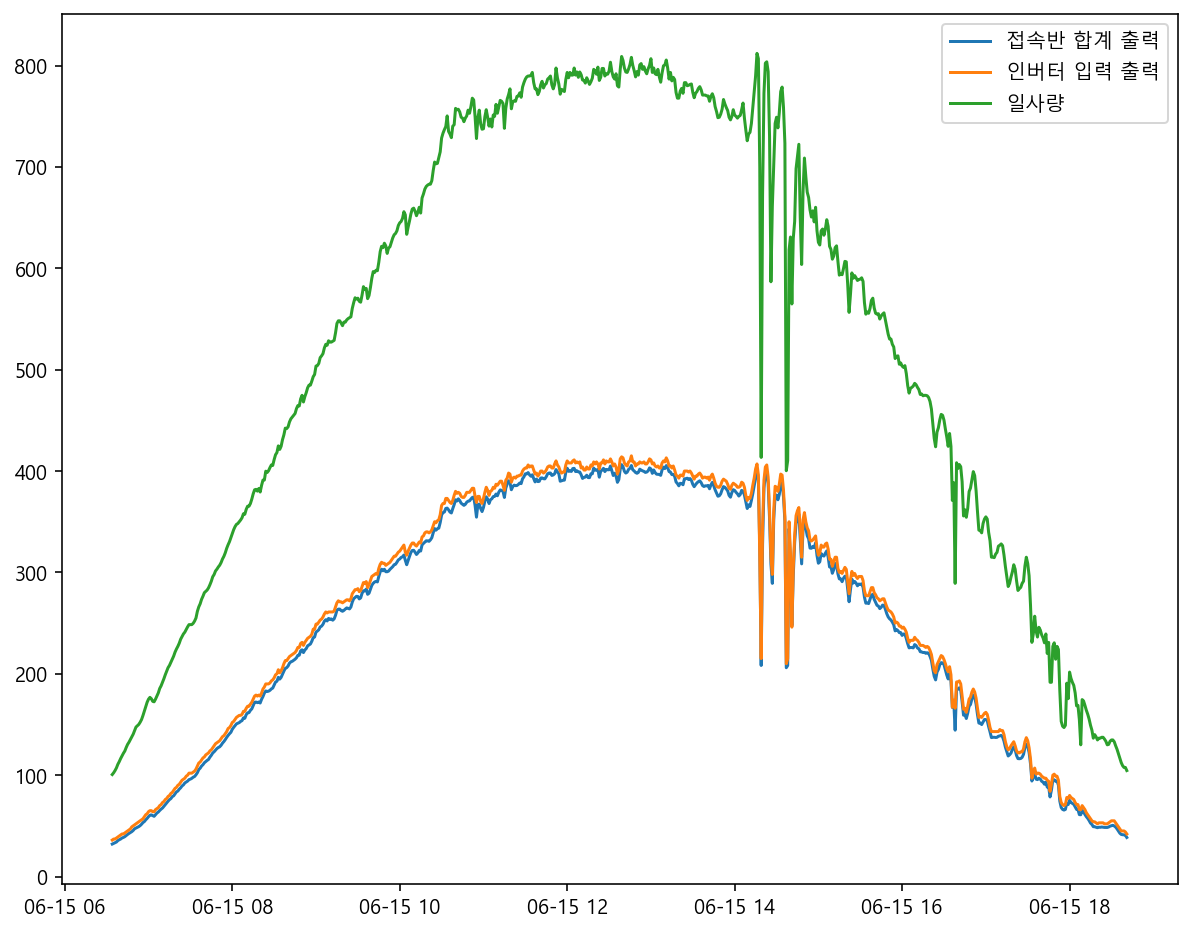

In [16]:
# 하절기(6월) 출력 비교
line_rate_df_6 = sub_conn_df[(sub_conn_df['create_date'] >= '2018-06-15 00:00:00')&(sub_conn_df['create_date'] <= '2018-06-15 23:59:00')]

plt.figure(figsize=(10, 8))

datetime_1 = line_rate_df_6['create_date']

plt.plot(datetime_1, line_rate_df_6['conn_kw'], label='접속반 합계 출력')
plt.plot(datetime_1, line_rate_df_6['solarkw'], label='인버터 입력 출력')
plt.plot(datetime_1, line_rate_df_6['irra'], label='일사량')

#plt.axvline(x='2018-06-15 09:30', color='r', linestyle=':', linewidth=2)
#plt.axvline(x='2018-06-15 15:40', color='r', linestyle=':', linewidth=2)

#plt.axhline(y=200, color='darkblue', linestyle=':', linewidth=2)

#plt.annotate('출력 유사 Start Point', xy=('2018-06-15 09:30:00', 200), xytext=('2018-06-15 11:00:00', 270), fontsize=12, ha='center',arrowprops=dict(facecolor='tomato', width=0.1, shrink=0.1, headwidth=3))
#plt.annotate('출력 유사 End Point', xy=('2018-06-15 15:40:00', 200), xytext=('2018-06-15 14:10:00', 270), fontsize=12, ha='center',arrowprops=dict(facecolor='tomato', width=0.1, shrink=0.1, headwidth=3))

plt.legend()

plt.show()

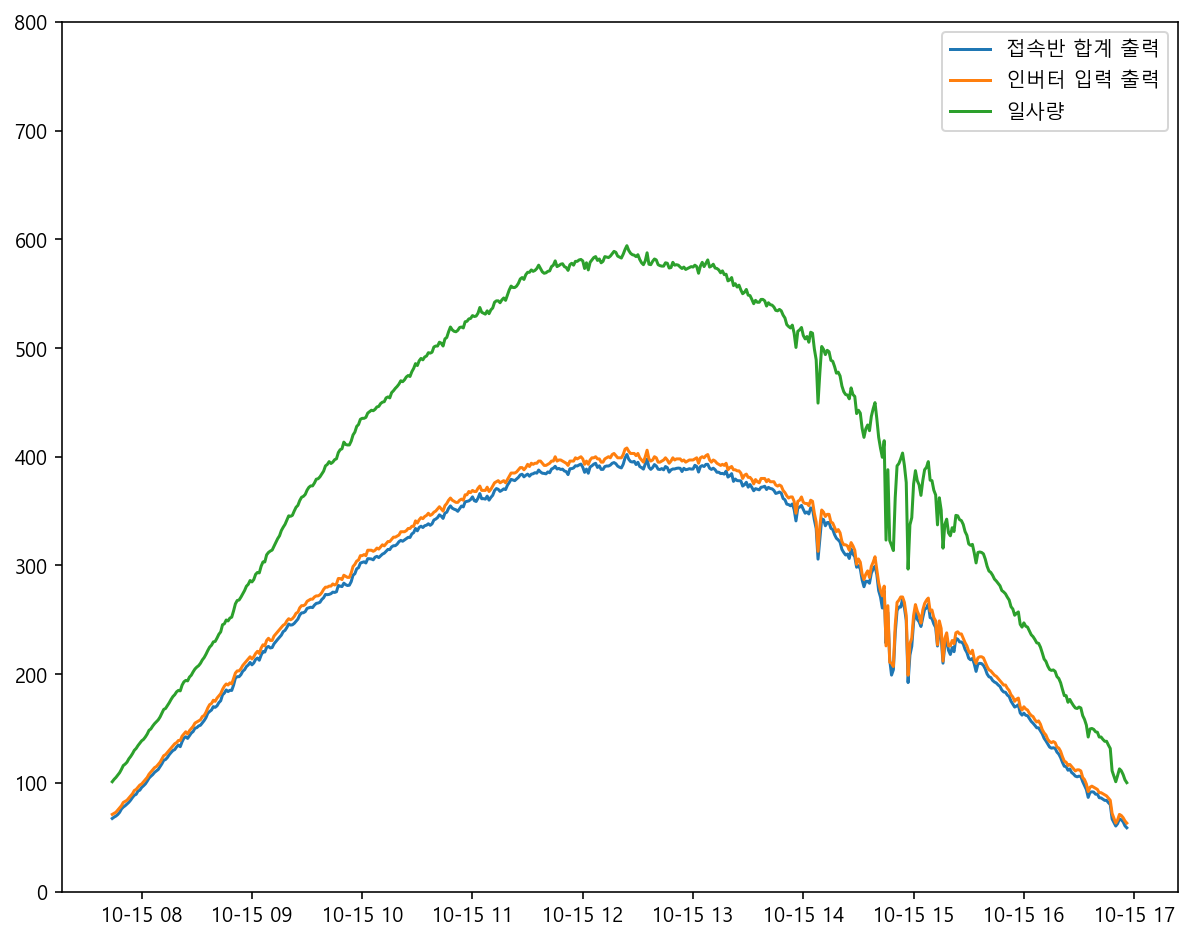

In [17]:
# 춘추절(9월) 출력 비교
group_date = '2018-10-15'

line_rate_df_9 = sub_conn_df[(sub_conn_df['create_date'] >= group_date+' 00:00:00')&(sub_conn_df['create_date'] <= group_date+' 23:59:00')]

plt.figure(figsize=(10, 8))

datetime_1 = line_rate_df_9['create_date']

plt.plot(datetime_1, line_rate_df_9['conn_kw'], label='접속반 합계 출력')
plt.plot(datetime_1, line_rate_df_9['solarkw'], label='인버터 입력 출력')
plt.plot(datetime_1, line_rate_df_9['irra'], label='일사량')

#plt.axvline(x='2018-06-15 09:30', color='r', linestyle=':', linewidth=2)
#plt.axvline(x='2018-06-15 15:40', color='r', linestyle=':', linewidth=2)

#plt.axhline(y=200, color='darkblue', linestyle=':', linewidth=2)

#plt.annotate('출력 유사 Start Point', xy=('2018-06-15 09:30:00', 200), xytext=('2018-06-15 11:00:00', 270), fontsize=12, ha='center',arrowprops=dict(facecolor='tomato', width=0.1, shrink=0.1, headwidth=3))
#plt.annotate('출력 유사 End Point', xy=('2018-06-15 15:40:00', 200), xytext=('2018-06-15 14:10:00', 270), fontsize=12, ha='center',arrowprops=dict(facecolor='tomato', width=0.1, shrink=0.1, headwidth=3))

plt.ylim(0, 800)

plt.legend()

plt.show()

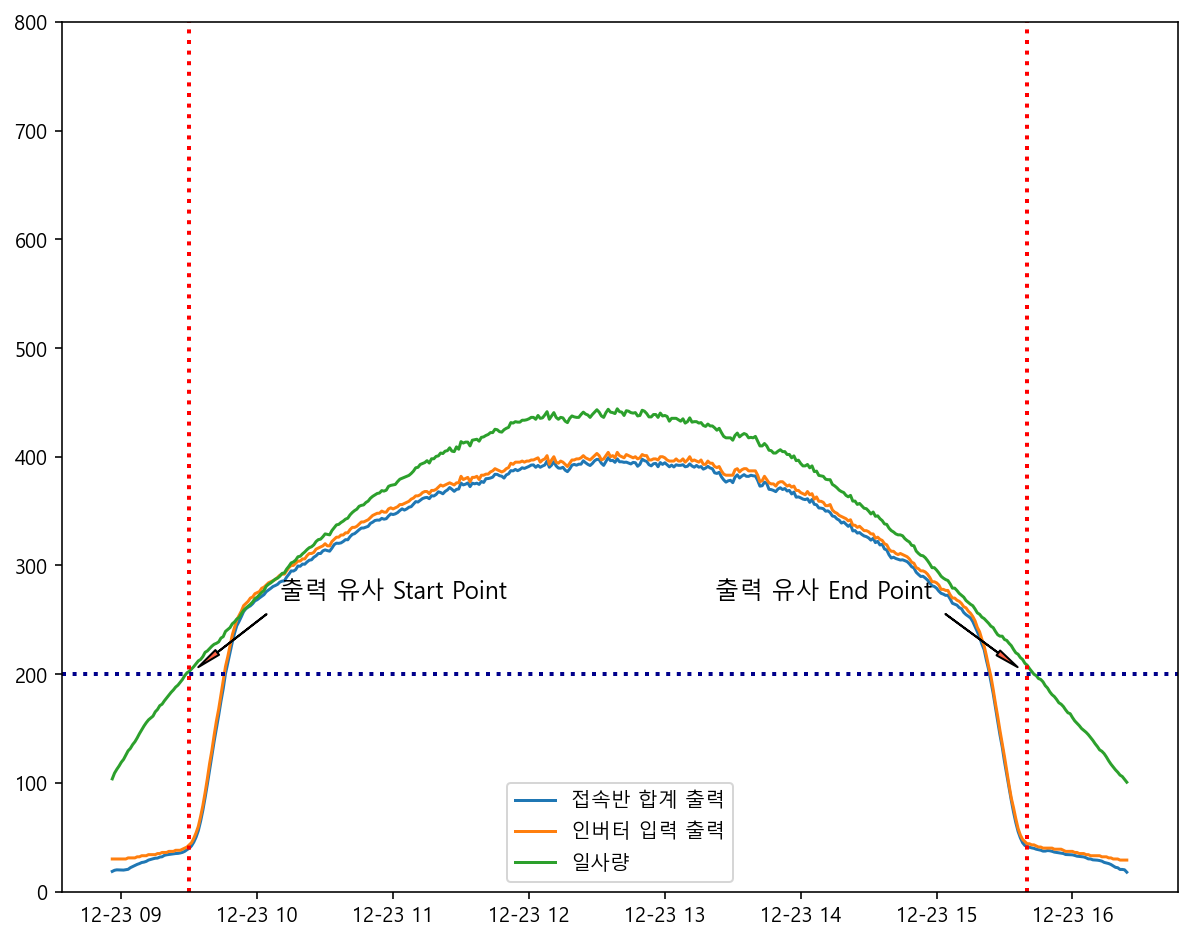

In [18]:
# 동절기(12월) 출력 비교
line_rate_df_12 = sub_conn_df[(sub_conn_df['create_date'] >= '2018-12-23 00:00:00')&(sub_conn_df['create_date'] <= '2018-12-23 23:59:00')]

plt.figure(figsize=(10, 8))

datetime_1 = line_rate_df_12['create_date']

plt.plot(datetime_1, line_rate_df_12['conn_kw'], label='접속반 합계 출력')
plt.plot(datetime_1, line_rate_df_12['solarkw'], label='인버터 입력 출력')
plt.plot(datetime_1, line_rate_df_12['irra'], label='일사량')

plt.axvline(x='2018-12-23 09:30', color='r', linestyle=':', linewidth=2)
plt.axvline(x='2018-12-23 15:40', color='r', linestyle=':', linewidth=2)

plt.axhline(y=200, color='darkblue', linestyle=':', linewidth=2)

plt.annotate('출력 유사 Start Point', xy=('2018-12-23 09:30:00', 200), xytext=('2018-12-23 11:00:00', 270), fontsize=12, ha='center',arrowprops=dict(facecolor='tomato', width=0.1, shrink=0.1, headwidth=3))
plt.annotate('출력 유사 End Point', xy=('2018-12-23 15:40:00', 200), xytext=('2018-12-23 14:10:00', 270), fontsize=12, ha='center',arrowprops=dict(facecolor='tomato', width=0.1, shrink=0.1, headwidth=3))

plt.ylim(0, 800)

plt.legend()

plt.show()

---
1. 접속반과 인버터의 출력을 비교하며, 배선 효율을 감시가 가능하다.
2. 감시할 경우 계절성과 시간에 유의하여야 하며, 모듈과 스트링에 문제가 없는 가정하에 배선효율을 산출하여야 한다.

<Figure size 720x576 with 0 Axes>

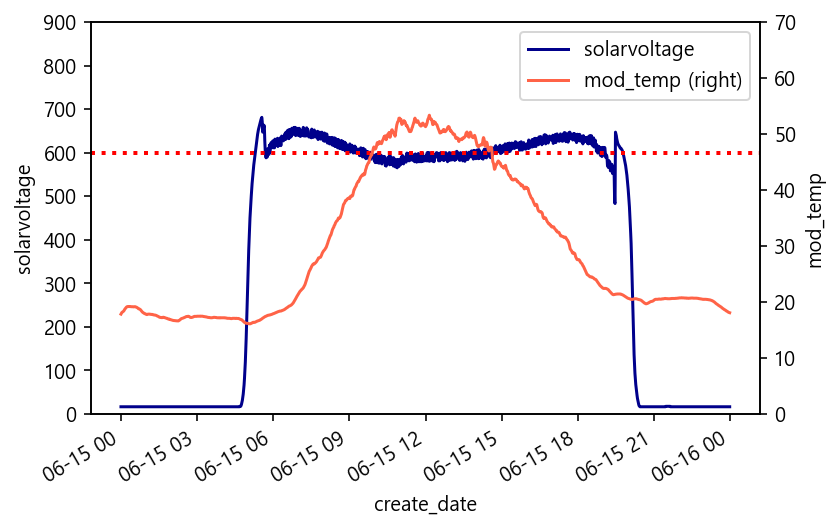

* 모듈의 최저온도 :  16.08  최고온도 :  53.35  평균온도 :  29.62
* 최대전압 :  670.0


In [19]:
# 하절기(6월)에 모듈온도와 전압의 관계

plt.figure(figsize=(10, 8))

ax_6 = graph_test_df6.plot(kind='line', x='create_date', y='solarvoltage', color='Darkblue')
ax_6_2 = graph_test_df6.plot(kind='line', x='create_date', y='mod_temp', color='tomato', secondary_y=True, ax=ax_6)

ax_6.set_ylabel('solarvoltage')
ax_6_2.set_ylabel('mod_temp')

ax_6.set_ylim(0, 900)
ax_6_2.set_ylim(0, 70)

ax_6.axhline(y=600, color='r', linestyle=':', linewidth='2')

plt.show()

mod_temp_6 = graph_test_df6['mod_temp']

print('* 모듈의 최저온도 : ', round(np.min(mod_temp_6), 2), ' 최고온도 : ', round(np.max(mod_temp_6), 2), ' 평균온도 : ', round(np.mean(mod_temp_6), 2))
print('* 최대전압 : ', round(np.max(graph_test_df6['v_min'])))

<Figure size 720x576 with 0 Axes>

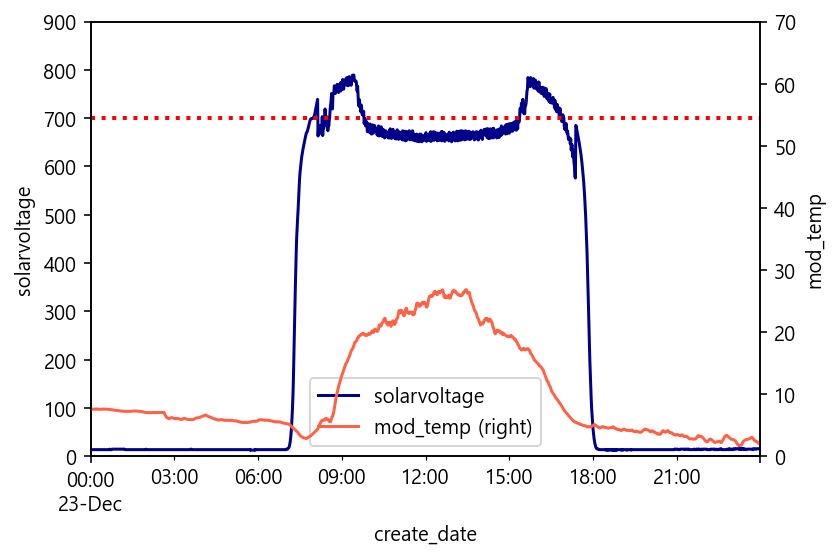

* 모듈의 최저온도 :  1.75  최고온도 :  26.85  평균온도 :  10.19
* 최대전압 :  769.0


In [20]:
# 동절기(12월)에 모듈온도와 전압의 관계

plt.figure(figsize=(10, 8))

ax_12 = graph_test_df12.plot(kind='line', x='create_date', y='solarvoltage', color='Darkblue')
ax_12_2 = graph_test_df12.plot(kind='line', x='create_date', y='mod_temp', color='tomato', secondary_y=True, ax=ax_12)

ax_12.set_ylabel('solarvoltage')
ax_12_2.set_ylabel('mod_temp')

ax_12.set_ylim(0, 900)
ax_12_2.set_ylim(0, 70)

ax_12.axhline(y=700, color='r', linestyle=':', linewidth='2')

plt.show()

mod_temp_12 = graph_test_df12['mod_temp']

print('* 모듈의 최저온도 : ', round(np.min(mod_temp_12), 2), ' 최고온도 : ', round(np.max(mod_temp_12), 2), ' 평균온도 : ', round(np.mean(mod_temp_12), 2))
print('* 최대전압 : ', round(np.max(graph_test_df12['v_min'])))

---
1. 동절기의 모듈평균 온도는 10.19℃로 모듈성능 기준인 25℃보다는 약 15℃ 낮은 온도를 보임
2. 하절기의 모듈평균 온도는 29.62℃로 모듈성능 기준인 25℃보다는 약 5℃ 높은 온도를 보임
3. 모듈온도의 영향으로 동절기 최대 전압은 769.0V이며, 하절기 최대 전압은 690.0V로 약 80V의 차이를 보임.
---

In [21]:
# 태양광 발전 예측에 모듈온도는 매우 중요한 변수이다.
# 모듈온도는 외기온도,일사량, 월에 영향을 받을 것이다.(가정)

sub_temp_df = sub_conn_group[['create_date', 'out_temp', 'mod_temp','irra']]

# copy하면 오류를 해결 가능
sub_temp_df = sub_temp_df.copy()

temp_create_date = sub_temp_df['create_date']

sub_temp_df['year'] = temp_create_date.dt.year
sub_temp_df['month'] = temp_create_date.dt.month
sub_temp_df['day'] = temp_create_date.dt.day
sub_temp_df['hour'] = temp_create_date.dt.hour

del sub_temp_df['create_date']

sub_temp_df = sub_temp_df[['year','month','day','hour','irra','out_temp','mod_temp']]

# 일사량이 1500Wh/m2보다 큰 값은 노이즈 데이터로 필터링 한다.
sub_temp_df = sub_temp_df[sub_temp_df['irra'] < 1500]

sub_temp_group = sub_temp_df.groupby(by=['year','month','day','hour'], as_index=False).mean()

# 외기온도와 모듈온도의 상관관계
out_temp = np.array(sub_temp_group['out_temp'])
mod_temp = np.array(sub_temp_group['mod_temp'])

# 1) 피어슨 상관계수
ps_t = stats.pearsonr(out_temp, mod_temp)
# 2) 스피어만 상관계수
sp_t = stats.spearmanr(out_temp, mod_temp)

print('---')
print('모듈온도와 외기온도의 피어슨 상관계수 : ', round(ps_t[0], 2))
print('모듈온도와 외기온도의 스피어만 상관계수 : ', round(sp_t[0], 2))
print('---')

# 모듈온도와 일사량의 상관관계
irra = np.array(sub_temp_group['irra'])

# 1) 피어슨 상관계수
ps_i = stats.pearsonr(mod_temp, irra)
# 2) 스피어만 상관계수
sp_i = stats.spearmanr(mod_temp, irra)

print('모듈온도와 일사량의 피어슨 상관계수 : ', round(ps_i[0], 2))
print('모듈온도와 일사량의 스피어만 상관계수 : ', round(sp_i[0], 2))
print('---')

sub_temp_group.describe()

---
모듈온도와 외기온도의 피어슨 상관계수 :  0.88
모듈온도와 외기온도의 스피어만 상관계수 :  0.89
---
모듈온도와 일사량의 피어슨 상관계수 :  0.76
모듈온도와 일사량의 스피어만 상관계수 :  0.53
---


,year,month,day,hour,irra,out_temp,mod_temp
count,23731.000000,23731.000000,23731.000000,23731.000000,23731.000000,23731.000000,23731.000000
mean,2018.066453,6.630188,15.660191,11.666006,159.159823,15.106024,19.133787
std,0.791500,3.406549,8.806335,6.638085,222.455532,10.097003,14.606610
min,2017.000000,1.000000,1.000000,0.000000,0.000000,-11.241250,-13.957917
25%,2017.000000,4.000000,8.000000,6.000000,0.437500,6.644583,7.443125
50%,2018.000000,7.000000,16.000000,12.000000,19.301042,15.559167,18.315417
75%,2019.000000,10.000000,23.000000,17.000000,278.939062,23.403365,27.702708
max,2019.000000,12.000000,31.000000,23.000000,865.528935,38.273750,65.528333


In [22]:
# DNN Regression function import
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [23]:
# 날짜와 온도 일사량 데이터를 사용하여 모듈온도를 예측하는 것이 가능함.
# train data와 test data를 구분
train_dataset = sub_temp_group[(sub_temp_group['year'] <= 2018) | 
                               ((sub_temp_group['year'] == 2019) & (sub_temp_group['month'] <= 10))]

drop_index = train_dataset.index

test_dataset = sub_temp_group.drop(drop_index)

test_dataset.reset_index(drop=True, inplace=True)

# year columns delete
del train_dataset['year']
del test_dataset['year']

# train, target data seperate
train_y = train_dataset.pop('mod_temp')
train_x = train_dataset

test_y = test_dataset.pop('mod_temp')
test_x = test_dataset

# 데이터 정규화
train_stats = train_x.describe().T

normed_train_data = (train_x - train_stats['mean']) / train_stats['std']
normed_test_data = (test_x - train_stats['mean']) / train_stats['std']

# 1. DNN Regression Model
model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(normed_train_data.keys())]),
        layers.Dense(1)])

model.compile(loss='mse',optimizer='adam',metrics=['mae', 'mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 학습 진행 여부 Test
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.46885073],
       [-0.5340356 ],
       [-0.62608176],
       [-0.7360629 ],
       [-0.79476607],
       [-0.8224313 ],
       [-0.8312019 ],
       [-0.8926346 ],
       [-0.9410165 ],
       [-0.9880127 ]], dtype=float32)

In [25]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 100

history = model.fit(
  normed_train_data, train_y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0, batch_size = 8,
  callbacks=[PrintDot()])


....................................................................................................

In [26]:
# 학습한 내용을 오차율 등을 확인할 수 있는 History
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,2.508131,1.086318,2.508131,1.900531,0.947894,1.900531,95
96,2.505162,1.088260,2.505162,1.928628,0.956863,1.928628,96
97,2.507313,1.085416,2.507313,1.990217,0.983319,1.990217,97
98,2.508861,1.088508,2.508861,1.940080,0.968509,1.940080,98
99,2.502218,1.086347,2.502218,1.988691,0.980965,1.988691,99


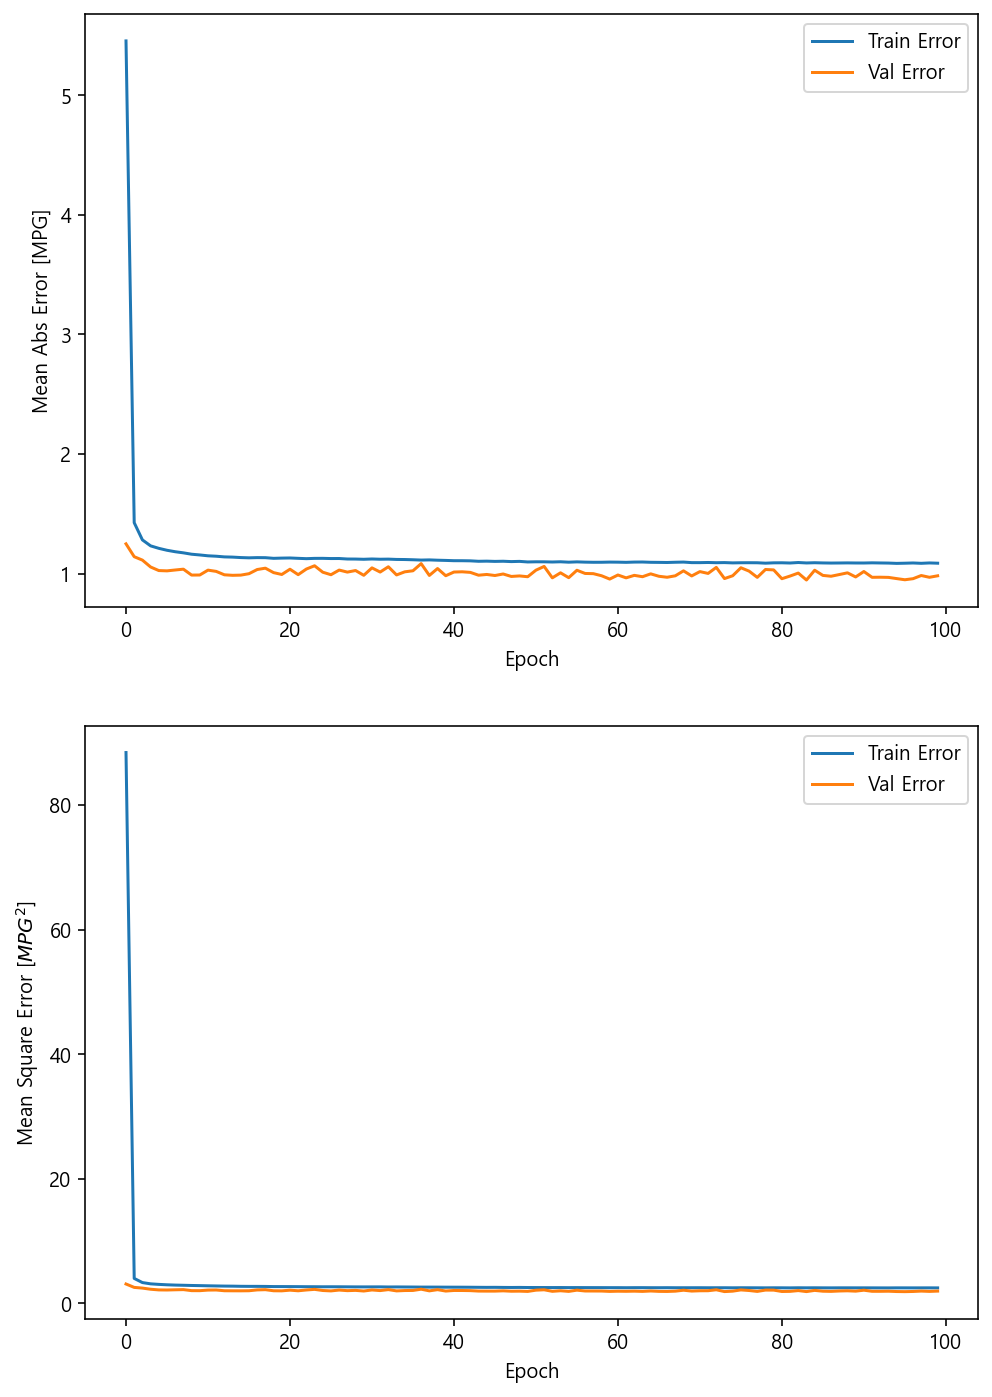

In [27]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim()
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim()
    plt.legend()
    plt.show()

plot_history(history)

In [28]:
# 오차율에 대한 수치
loss, mae, mse = model.evaluate(normed_test_data, test_y, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f}도".format(mae))

31/31 - 0s - loss: 2.8222 - mae: 1.1801 - mse: 2.8222
테스트 세트의 평균 절대 오차:  1.18도


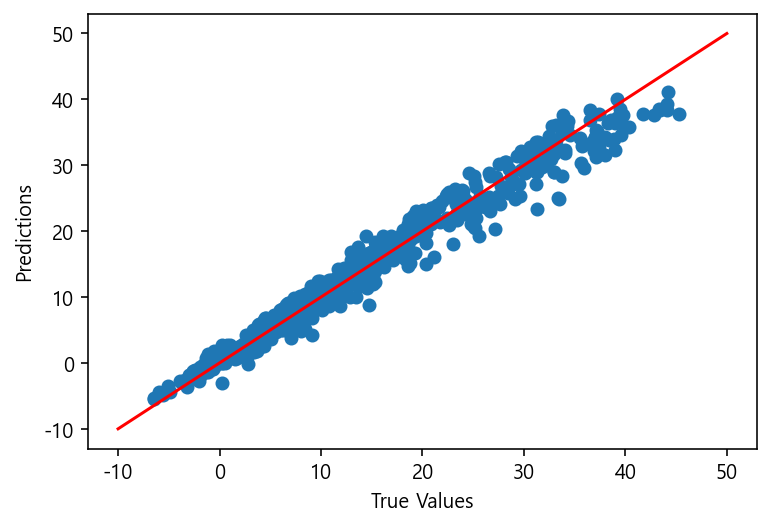

In [29]:
# 예측값과 실제값의 1:1 scatter 그래프
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_y, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

_ = plt.plot([-10, 50], [-10, 50], 'r-')

plt.show()

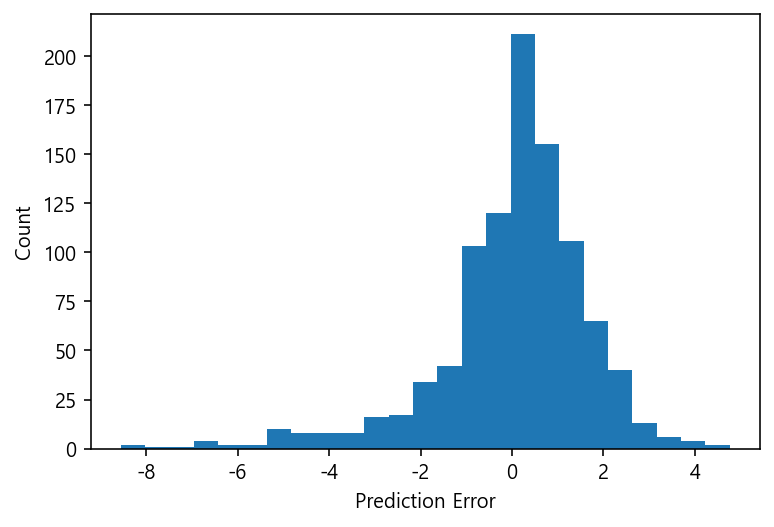

In [30]:
# 오차값에 대한 히스토그램
error = test_predictions - test_y
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [31]:
# 예측 값에 대한 내용 정리
result_df = test_x.copy()

result_df['mod_temp'] = test_y
result_df['pre_temp'] = test_predictions

result_df.head()

,month,day,hour,irra,out_temp,mod_temp,pre_temp
0,11,1,0,0.196875,11.866250,10.479167,10.896267
1,11,1,1,0.289195,11.915678,10.837712,10.967781
2,11,1,2,0.204167,12.009167,10.830417,11.088085
3,11,1,3,0.204167,12.160834,11.271667,11.280382
4,11,1,4,0.218750,11.772083,10.683333,10.823030


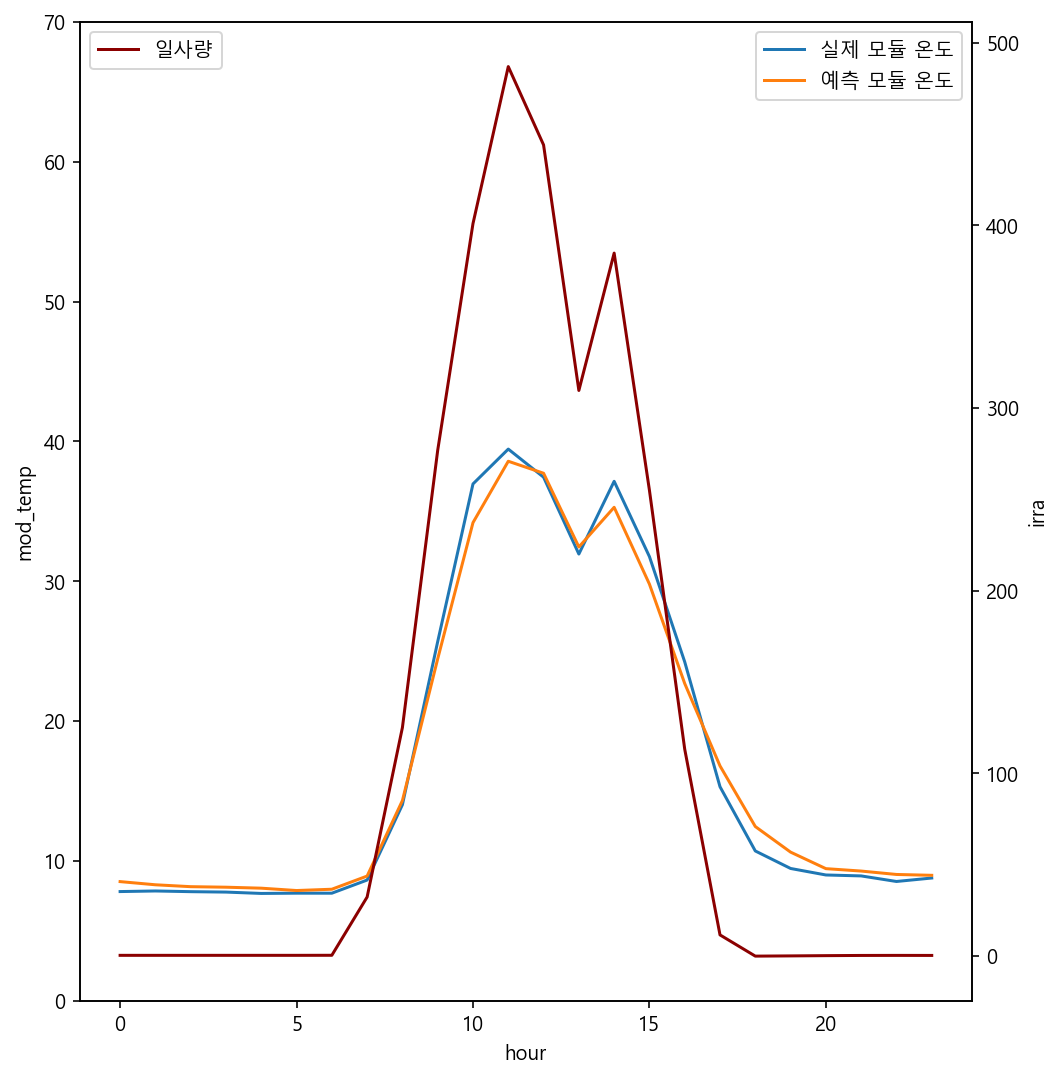

In [32]:
# 예측 데이터 시각화
temp_plot_df = result_df[(result_df['month'] == 11) & (result_df['day'] == 4)]

t_ax = plt.figure(figsize=(8, 9))

# sub_plot
ax_t = t_ax.add_subplot()

ax_t.plot(temp_plot_df['hour'], temp_plot_df['mod_temp'],label='실제 모듈 온도')
ax_t.plot(temp_plot_df['hour'], temp_plot_df['pre_temp'], label='예측 모듈 온도')

ax_t2 = ax_t.twinx()
ax_t2.plot(temp_plot_df['hour'], temp_plot_df['irra'], color='darkred',label='일사량')

ax_t.set_ylim(0, 70)

ax_t.set_xlabel('hour')
ax_t.set_ylabel('mod_temp')
ax_t2.set_ylabel('irra')

ax_t.legend(loc=0)
ax_t2.legend(loc=2)

plt.show()

---
1. 모듈온도는 일사량과 외기온도를 사용하여, 충분히 예측이 가능함
2. 일사량이 증가함에 따라 온도도 비슷한 형태로 증가하지만, 일사량의 감소로 발전소 출력이 떨어지면 빠르게 온도가 감소하는 것을 확인
3. 일사량이 감소하는 것보다 온도가 더 천천히 감소함
4. 동절기에는 일사량 감소에 즉각적인 온도 변화를 확인 할수 있으나, 하절기에는 일사량의 변화에 모듈온도 변화가 상대적으로 작을 것으로 예상됨
---

##### **기상청의 데이터를 사용하여 발전소의 기상 상황을 예측 할수 있다.**

1. 발전소의 기상 데이터와 기상청 데이터를 비교
2. 기상청 데이터의 일사량, 온도, 풍속, 강우량등을 사용하여 발전소의 일사량 외기온도를 추정할수 있다.
3. 구름은 예측 불가능 한 것이나, 바다에서 발생하는 해무에 영향은 예측 가능할 것으로 추정됨.
---

In [49]:
# 기상청 데이터 불러오기
meteo_df = pd.DataFrame()

# 2017 ~ 2019 년 데이터 불러오기
meteo_file_path = 'D:/99. Big data engine & dashboard/1. kcse/3. raw_data/3. dsolar/meteo_wt/'

meteo_1 = pd.read_csv(meteo_file_path+'2017.csv', encoding='euc-kr')
meteo_df = pd.concat([meteo_df, meteo_1], ignore_index=True, copy=True)
meteo_2 = pd.read_csv(meteo_file_path+'2018.csv', encoding='euc-kr')
meteo_df = pd.concat([meteo_df, meteo_2], ignore_index=True, copy=True)
meteo_3 = pd.read_csv(meteo_file_path+'2019.csv', encoding='euc-kr')
meteo_df = pd.concat([meteo_df, meteo_3], ignore_index=True, copy=True)

meteo_df.drop(['지점','지점명','강수량(mm)','풍향(16방위)','습도(%)','현지기압(hPa)','해면기압(hPa)','지면온도(°C)'], axis=1, inplace=True)

meteo_df.rename(columns={'일시':'create_date','기온(°C)':'m_temp','풍속(m/s)':'m_wind','일사(MJ/m2)':'m_irra','전운량(10분위)':'m_cloud'}, inplace=True)

meteo_df = meteo_df[['create_date','m_irra','m_temp','m_wind','m_cloud']]

meteo_df.fillna(0.0, inplace=True)

meteo_df['m_irra'] = meteo_df['m_irra'] / 3.6 * 1000

meteo_df.head()

,create_date,m_irra,m_temp,m_wind,m_cloud
0,2017-06-01 00:00,0.0,21.9,3.3,0.0
1,2017-06-01 01:00,0.0,21.7,4.4,0.0
2,2017-06-01 02:00,0.0,21.7,2.8,0.0
3,2017-06-01 03:00,0.0,21.2,1.0,0.0
4,2017-06-01 04:00,0.0,20.7,0.8,0.0


In [60]:
# 기상청 데이터와 발전소 기상 데이터를 병합(병합 기준은 발전소 기상 데이터 기준)
meteo_df['create_date'] = pd.to_datetime(meteo_df['create_date'])

meteo_total_df = total_wt.merge(meteo_df, on='create_date', how='inner')

# 기상청 일사량과 발전소 일사량의 상관관계
irra = np.array(meteo_total_df['irra'])
m_irra = np.array(meteo_total_df['m_irra'])

# 1) 피어슨 상관계수
ps_m = stats.pearsonr(irra, m_irra)
# 2) 스피어만 상관계수
sp_m = stats.spearmanr(irra, m_irra)

print('---')
print('1. 발전소 일사량과 기상청 일사량의 피어슨 상관계수 : ', round(ps_m[0], 2))
print('2. 발전소 일사량과 기상청 일사량의 스피어만 상관계수 : ', round(sp_m[0], 2))
print('---')

meteo_total_df.describe()

---
발전소 일사량과 기상청 일사량의 피어슨 상관계수 :  0.92
발전소 일사량과 기상청 일사량의 스피어만 상관계수 :  0.88
---


,irra,out_temp,mod_temp,m_irra,m_temp,m_wind,m_cloud
count,21569.000000,21569.000000,21569.000000,21569.000000,21569.000000,21569.000000,21569.000000
mean,148.528360,15.551502,19.255408,178.378692,14.053350,1.927424,3.121471
std,222.643699,10.196124,14.758511,266.159806,10.499447,1.642359,3.940416
min,0.000000,-11.300000,-13.950000,0.000000,-14.800000,0.000000,0.000000
25%,0.437500,7.025000,7.450001,0.000000,5.300000,0.600000,0.000000
50%,6.562500,16.400002,18.575001,2.777778,15.300000,1.600000,0.000000
75%,243.250000,23.924999,27.674999,302.777778,22.800000,2.900000,7.000000
max,1078.875000,38.724998,64.625000,1072.222222,36.500000,12.200000,10.000000


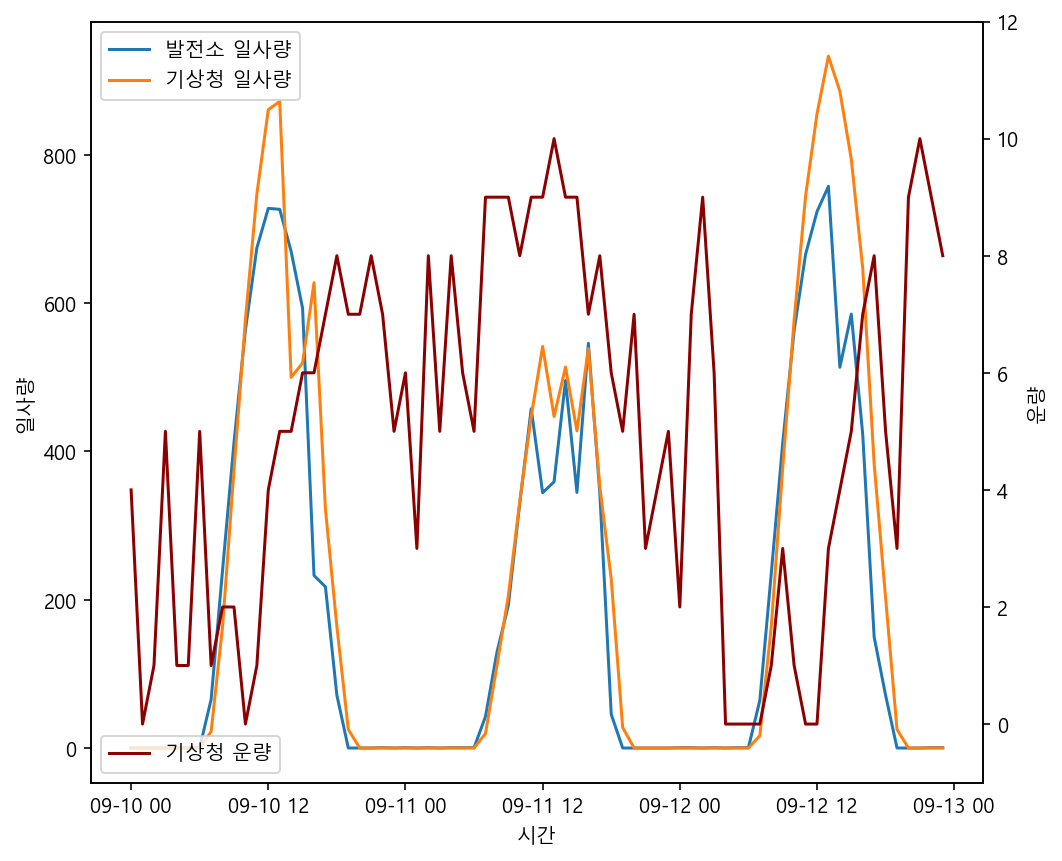

In [76]:
# 기상청 일사량과 발전소 일사량의 관계를 파악
# 운량을 추가하여 어떤 여향이 있는지 시각화

m_create_date = meteo_total_df['create_date']

test_meteo_df = meteo_total_df[(m_create_date >= '2018-09-10 00:00:00') & (m_create_date <= '2018-09-12 23:59:00')]

t_create_date = test_meteo_df['create_date']

m_fig = plt.figure(figsize=(8, 7))

m_ax = m_fig.add_subplot()

m_ax.plot(t_create_date, test_meteo_df['irra'], label='발전소 일사량')
m_ax.plot(t_create_date, test_meteo_df['m_irra'], label='기상청 일사량')

m_ax2 = m_ax.twinx()

m_ax2.plot(t_create_date, test_meteo_df['m_cloud'], color = 'darkred',label='기상청 운량')

m_ax.set_ylabel('일사량')
m_ax2.set_ylabel('운량')

m_ax.set_xlabel('시간')

m_ax2.set_ylim(-1, 12)

m_ax.legend(loc=0)
m_ax2.legend(loc=3)

plt.show()

* 발전소의 일사량은 구름이 없는 맑은 날의 일사량과 패턴이 유사함.
* 기상청의 일사량은 운량이 증가함에 따라 감소하는 패턴을 보여 관계가 있음.

---
1. 기상청 일사량과 기상청 운량으로 발전소 일사량과의 관계를 파악하기는 어려울 것으로 판단됨
2. 영광 기상청과 발전소의 직선거리는 약 12km로 발전소는 해안가에 위치하며, 기상대는 내륙에 위치함.
![dsolarpng.png](./dsolarpng.png)
3. 해안가의 기상 특성과 내륙의 기상특성의 패턴이 일치하지 않으므로 기상청 데이터로 발전소의 기상을 예측하긴 어려울 것으로 판단됨.